딥러닝 라이브러리
 케라스(keras)를 사용해 딥러닝을 실행시킵니다.
 케라스가 구동되려면 텐서플로(TensorFlow) 또는 씨아노(theano)라는 두 가지 라이브러리 중 하나가 미리
설치되어 있어야 합니다
12
환경설정 및 라이브러리

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [5]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

NameError: name 'X_train' is not defined

In [ ]:
MNIST 손글씨 인식하기: 데이터 전처리
 28 × 28 = 784개의 속성을 이용해 0~9까지 10개 클래스 중 하나를 맞히는 분류 문제가 됩니다.
 Reshape() 함수를 사용하여 가로 28, 세로 28의 2차원 배열을 784개의 1차원 배열로 바꿔 주어야 합니다.
 케라스는 데이터를 0에서 1 사이의 값으로 변환해야 구동할 때 최적의 성능을 보이므로 0~255 사이의
값으로 이루어진 값을 0~1 사이의 값으로 값을 255로 나누어 데이터 정규화(normalization) 합니다.
 Y_class를 np_utils.to_categorical(클래스, 클래스의 개수)를 사용하여 원-핫 인코딩 합니다.
120
딥러닝 동작원리

In [10]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy
import sys
import tensorflow as tf

seed = 0
numpy.random.seed(seed) # seed 값 설정
tf.set_random_seed(seed)

# MNIST 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


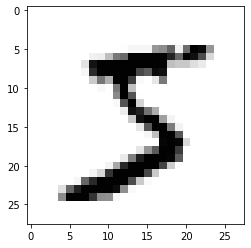

In [11]:
import matplotlib.pyplot as plt # 그래프로 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [12]:
for x in X_train[0]: # 코드로 확인
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [13]:
    # 차원 변환 과정
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') /255

print("class : %d " % (Y_class_train[0])) # 클래스 값 확인

# 바이너리화 과정
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import os

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']


Epoch 00001: val_loss improved from inf to 0.07795, saving model to ./model/01-0.0779.hdf5

Epoch 00002: val_loss improved from 0.07795 to 0.07051, saving model to ./model/02-0.0705.hdf5

Epoch 00003: val_loss improved from 0.07051 to 0.06930, saving model to ./model/03-0.0693.hdf5

Epoch 00004: val_loss improved from 0.06930 to 0.06896, saving model to ./model/04-0.0690.hdf5

Epoch 00005: val_loss improved from 0.06896 to 0.06433, saving model to ./model/05-0.0643.hdf5

Epoch 00006: val_loss did not improve from 0.06433

Epoch 00007: val_loss improved from 0.06433 to 0.06342, saving model to ./model/07-0.0634.hdf5

Epoch 00008: val_loss improved from 0.06342 to 0.06007, saving model to ./model/08-0.0601.hdf5

Epoch 00009: val_loss did not improve from 0.06007

Epoch 00010: val_loss did not improve from 0.06007

Epoch 00011: val_loss did not improve from 0.06007

Epoch 00012: val_loss did not improve from 0.06007

Epoch 00013: val_loss did not improve from 0.06007

Epoch 00014: val_lo

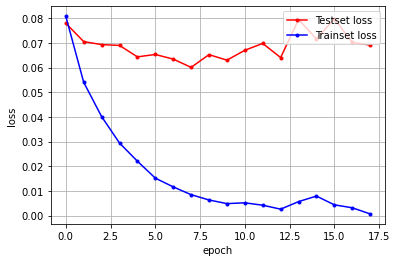

In [29]:
# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


Epoch 00001: val_loss improved from inf to 0.15520, saving model to ./model/01-0.1552.hdf5

Epoch 00002: val_loss improved from 0.15520 to 0.10487, saving model to ./model/02-0.1049.hdf5

Epoch 00003: val_loss improved from 0.10487 to 0.08493, saving model to ./model/03-0.0849.hdf5

Epoch 00004: val_loss improved from 0.08493 to 0.07960, saving model to ./model/04-0.0796.hdf5

Epoch 00005: val_loss improved from 0.07960 to 0.06786, saving model to ./model/05-0.0679.hdf5

Epoch 00006: val_loss improved from 0.06786 to 0.06413, saving model to ./model/06-0.0641.hdf5

Epoch 00007: val_loss did not improve from 0.06413

Epoch 00008: val_loss improved from 0.06413 to 0.06327, saving model to ./model/08-0.0633.hdf5

Epoch 00009: val_loss improved from 0.06327 to 0.05877, saving model to ./model/09-0.0588.hdf5

Epoch 00010: val_loss did not improve from 0.05877

Epoch 00011: val_loss did not improve from 0.05877

Epoch 00012: val_loss did not improve from 0.05877

Epoch 00013: val_loss did n

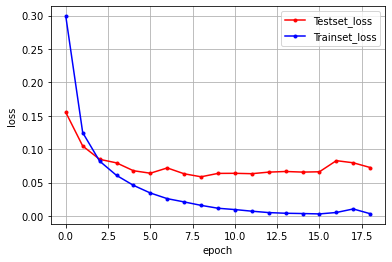

In [30]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
#tf.set_random_seed(seed)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show() 

In [ ]:
########## #fiter, pooling, Dropout 적용###################
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
#tf.set_random_seed(seed)

# 데이터 불러오기

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
#####################################################
텍스트 마이닝 
비정형 데이터에서 의미 있는 정보를 추출하는 기술
텍스트 분류 - 문장 또는 문서를 특정 카테고리로 분류, 예측
예) 신문기사와 같은 문서를 기사 내용에 따라 정치/경제/사회/문화등의 카테고리로 분류,  
메일의 내용을 분석해서 스팸 메일 분류
감정분석 -텍스트에서 나타나는 감정/판단/의견 등의 주관적인 요소를 분석하는 기법
예) 소셜 미디어 분석, 영화나 제품에 대해서 긍정 또는 리뷰, 조사, 의견 분석등에 활용
텍스트 요약 - 텍스트내엣 중요한 주제, 결론, 중심사상등을 추출하는 기법
텍스트 군집화, 텍스트 유사도 측정

NLP 자연어 처리   - 텍스트 분석을 향상시키는 기반 기술

텍스트 분석 단계 "
1. Feature Vectorization : 비정형 텍스트를 Feature 형태로 변환 (특성 추출)
    BOW(Bag of Words), Word2Vect
    cleansing > 대소문자 변환 > 특수문자 제거 > 토큰화 >  의미없는 불용어 제거 > 어근 추출(Stemming/Lemmatization) > 텍스트 정규화

NLTK  (자연어 처리 라이브러리 )
Gensim : 토픽 모델링 분야의 패키지
SpaCy :  토픽 모델링 분야의 패키지, 성능이 뛰어남

cleansing - nltk.download('punkt')
sent_tokenize()  문장 토큰화
word_tokenize() 단어 토큰화
2개의 단어, 3개의 단어 등으로 토큰화 : n-gram
필터링 : stop word 제거, 철자 수정 (Stemming/Lemmatization)
CountVectorizer
TfidfVectorizer